In [ ]:
# Step 1: Install fastai and bing-image-downloader
!pip install -Uqq fastai
!pip install -Uqq bing-image-downloader

# Step 2: Import necessary libraries
from fastdownload import FastDownload
from fastai.vision.all import *
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Footwear Recognizer Project

/content/drive/MyDrive/Footwear Recognizer Project


In [ ]:
footwear_labels = [
    "Sneakers",
    "Running_Shoes",
    "Sandals",
    "Formal_Shoes_Oxford_Derby",
    "Loafers",
    "High_Heels",
    "Boots",
    "Flip-Flops",
    "Slippers",
    "Sports_Cleats",
    "Wedges_shoes",
    "Ballet_Flats"
]
print(len(footwear_labels))


12


In [ ]:
from bing_image_downloader import downloader
from pathlib import Path
import time

# Create main folder
path = Path("footwear_data")
path.mkdir(parents=True, exist_ok=True)

# Download 500 images for each footwear category
for label in footwear_labels:
    print(f"\nDownloading {label} ...")
    try:
        downloader.download(
            label,
            limit=500,
            output_dir=str(path),
            adult_filter_off=True,
            force_replace=False,
            timeout=60
        )
    except Exception as e:
        print(f"Error downloading {label}: {e}")

    # Pause a bit to avoid overloading requests
    time.sleep(5)

print("Download completed for all categories!")


Streaming output truncated to the last 5000 lines.


[!!]Indexing page: 35

[%] Indexed 35 Images on Page 35.




[!!]Indexing page: 36

[%] Indexed 35 Images on Page 36.


[%] Downloading Image #85 from https://publish.purewow.net/wp-content/uploads/sites/2/2023/03/ballet-flats-with-arch-support_rothys-the-flat.jpg?fit=680%2C800
[%] File Downloaded !



[!!]Indexing page: 37

[%] Indexed 35 Images on Page 37.




[!!]Indexing page: 38

[%] Indexed 35 Images on Page 38.




[!!]Indexing page: 39

[%] Indexed 35 Images on Page 39.




[!!]Indexing page: 40

[%] Indexed 35 Images on Page 40.


[%] Downloading Image #86 from https://anninc.scene7.com/is/image/LO/753265_2222_D1?$fullBpdp$
[%] File Downloaded !

[%] Downloading Image #87 from https://www.andresmachado.com/2112-pdt_540/bow-ballet-flats-in-navy-leather.jpg
[!] Issue getting: https://www.andresmachado.com/2112-pdt_540/bow-ballet-flats-in-navy-leather.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #87 from http

In [ ]:
footwear_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),   # 80% train, 20% valid
    get_y=parent_label,                               # labels = folder names
    item_tfms=Resize(224)                             # resize images
)

In [ ]:
dls = footwear_block.dataloaders(path, bs=32)  # bs = batch size


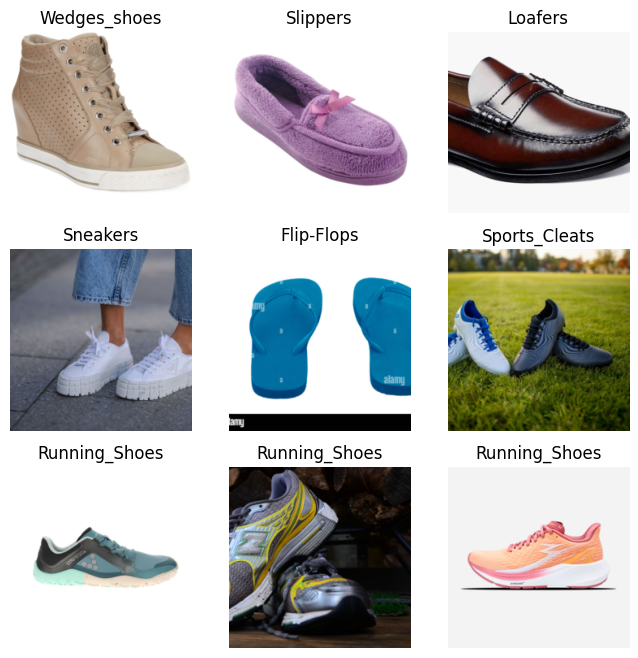

In [ ]:
dls.show_batch(max_n=9, figsize=(8, 8))


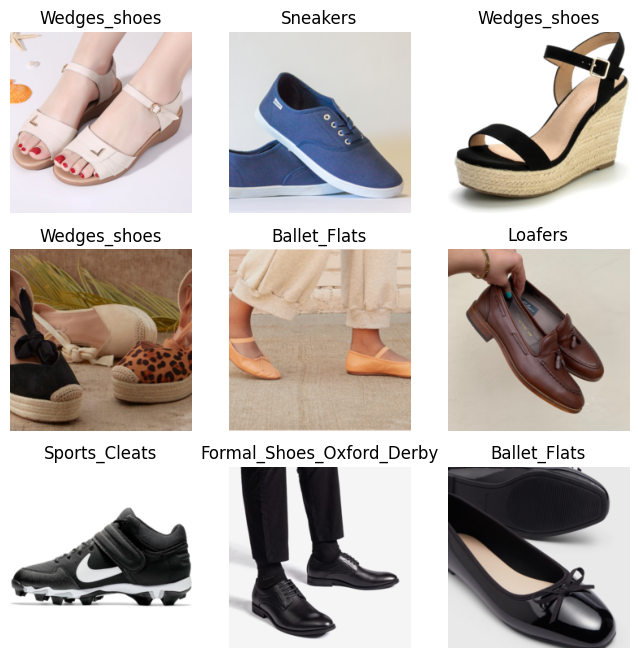

In [ ]:
dls.valid.show_batch(max_n=9, figsize=(8, 8))


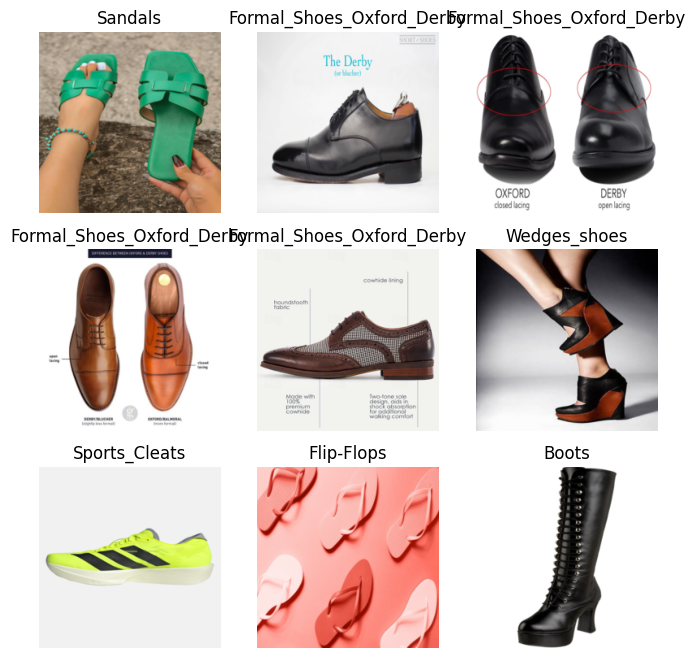

In [ ]:
dls = footwear_block.new(
    item_tfms=Resize(224, method='squish')  # squish: resizes without preserving aspect ratio
).dataloaders(path, bs=32)

dls.show_batch(max_n=9, figsize=(8,8))


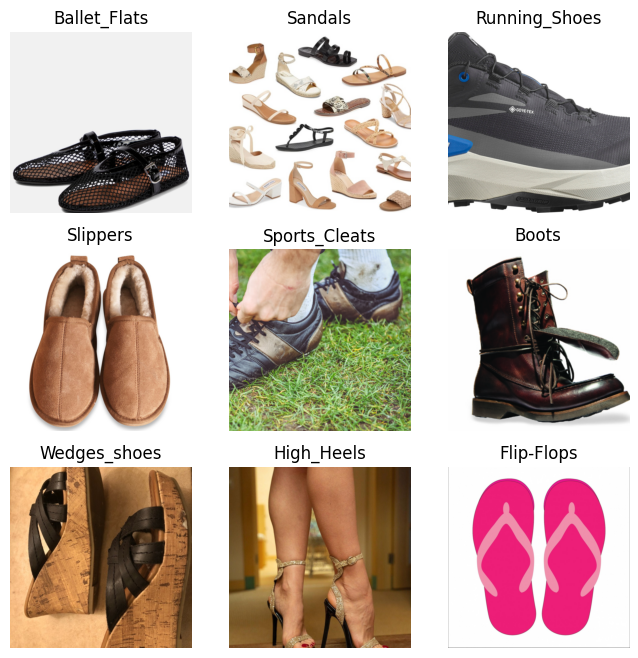

In [ ]:
dls = footwear_block.new(
    item_tfms=Resize(460),                     # resize bigger first
    batch_tfms=RandomResizedCrop(224, min_scale=0.75)  # random crop into 224x224
).dataloaders(path, bs=32)

dls.show_batch(max_n=9, figsize=(8,8))


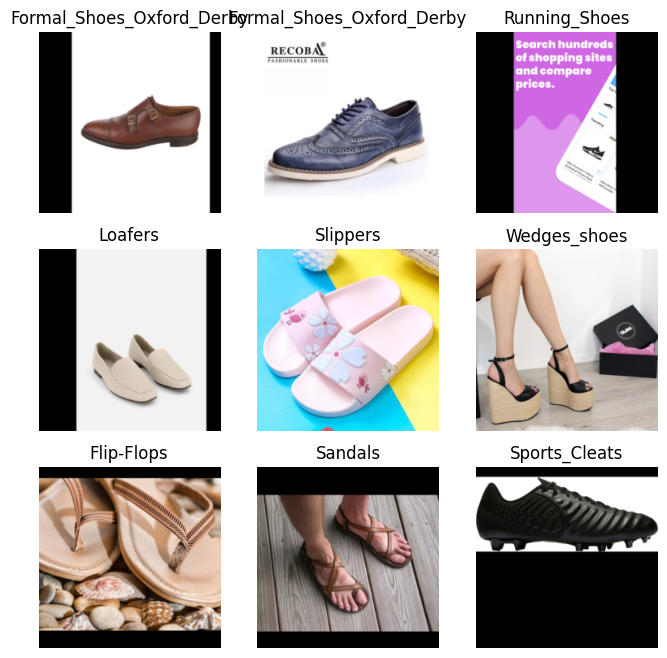

In [ ]:
dls = footwear_block.new(
    item_tfms=Resize(224, method='pad', pad_mode='zeros')  # pad with black borders
).dataloaders(path, bs=32)

dls.show_batch(max_n=9, figsize=(8,8))


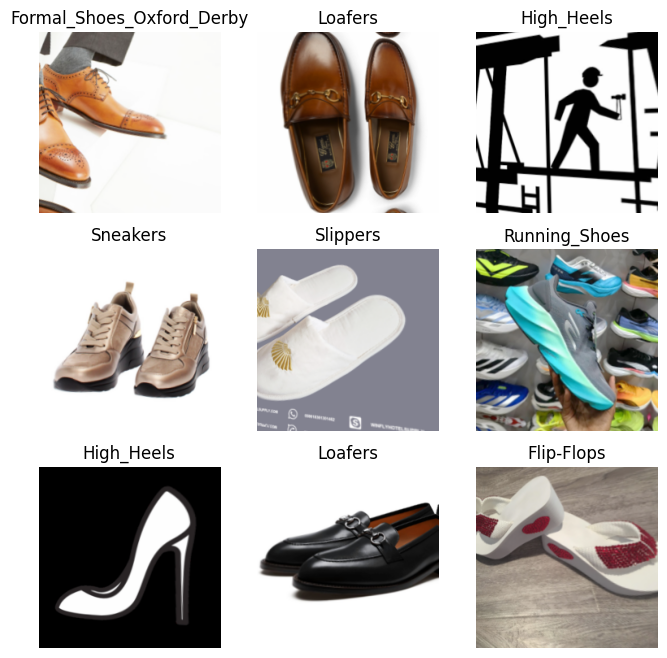

In [ ]:
dls = footwear_block.new(
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(   # common augmentations
        flip_vert=False,         # vertical flip off (shoes upside down = weird)
        max_rotate=15,           # slight rotation
        max_zoom=1.1,            # small zoom
        max_lighting=0.2,        # lighting changes
        max_warp=0.2,            # perspective warp
    )
).dataloaders(path, bs=32)

dls.show_batch(max_n=9, figsize=(8,8))


In [ ]:
torch.save(dls,'footwear_dataloaders_v0.pkl')